# Mathematik für Biologiestudierende

Wintersemester 2025/26

28.01.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen

* Vorhersagen
* zwei Arten von Konfidenzintervallen bei Vorhersagen
* die Daten von Galton

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf  #   <-----  neu

# Vorhersagen (prediction) und Konfidenzintervalle für die mittleren zu erwarteten Werte

In [2]:
blutdruck = pd.read_csv('blutdruckdaten.csv')
blutdruck.describe()

,Alter,Blutdruck,Größe
count,30.000000,30.000000,30.000000
mean,44.800000,147.933333,176.373333
std,15.202994,27.391080,5.349504
min,17.000000,108.000000,165.300000
25%,37.250000,125.250000,173.350000
50%,45.000000,144.500000,176.650000
75%,56.000000,173.250000,179.075000
max,69.000000,199.000000,189.000000


In [3]:
formel = 'Blutdruck ~ Alter'

* In dieser Formel ist `Alter` die erklärende und `Blutdruck` die abhängige Variable
* Die erklärenden Variablen heißen auch *exogen*, die abhängigen *endogen*
* englisch:
  * abhängig: *dependent* oder *outcome variable*
  * erklärend:  *predictor*    

[Passender Cartoon von xkcd](https://xkcd.com/3101/)

In [4]:
modell = smf.ols(formel, blutdruck)
res = modell.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           8.17e-09
Time:                        10:41:36   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Aufgabe aus Lektion 25:  Welchen Blutdruck erwartet man für einen 50-jährigen?

* das hatten wir dort zu Fuß ausgerechnet

* In der Sprache der linearen Modelle handelt es sich um eine Vorhersage, engl. *prediction*

* Wir verwenden nun die Methode `get_prediction`
* Dazu müssen die Daten der erklärenden Variablen in einen DataFrame geschrieben werden

In [5]:
anfrage = pd.DataFrame()
anfrage['Alter'] = [50]
#  rechte Seite ist immer ein array, auch wenn nur ein Wert berechnet werden soll
anfrage

,Alter
0,50


In [6]:
res.get_prediction(anfrage).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,155.775537,2.948193,149.736438,161.814636,123.956163,187.59491


* Man erwartet einen Blutdruck von 155.77 mm Hg
* Das stimmt bis auf Rundungsfehler mit dem Ergebnis aus Lektion 25 überein

* `mean`:  Wert, der im Mittel zu erwarten ist
* `mean_se`:  Standardabweichung für `mean`

* die vier anderen Werte sind untere bzw. obere Grenzen für Konfidenzintervalle
* `mean_ci` ist das Konfidenzintervall für den mittleren zu erwartenden Wert
* `obs_ci` ist das Konfidentintervall für den individuell zu beobachtenden Wert (engl: "observed")

* `mean_ci_lower` und `mean_ci_upper` begrenzen die blaue Kurve im `regplot`

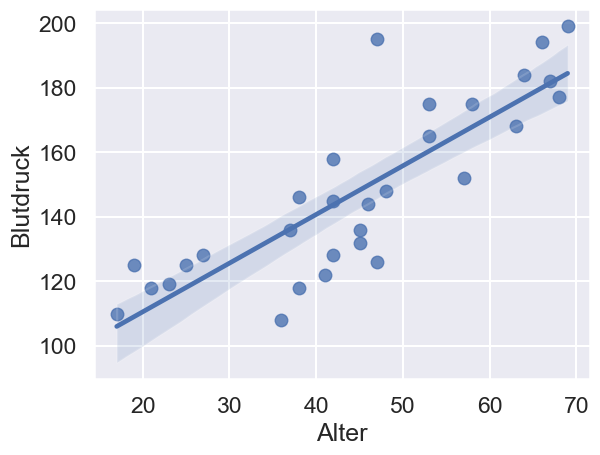

In [7]:
ax = sns.regplot(blutdruck, x='Alter', y='Blutdruck')

# Konfidenzintervalle für die erwarteten Beobachtungen 

* `obs_ci_lower` und `obs_ci_upper` begrenzen einen Bereich, der 95% der erwarteten Beobachtungen enthält

* wir malen den mal hin

In [8]:
anfrage = pd.DataFrame()
anfrage['Alter'] = np.arange(18, 70)
anfrage.head()

,Alter
0,18
1,19
2,20
3,21
4,22


In [9]:
vorhersage = res.get_prediction(anfrage).summary_frame()
vorhersage.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,107.515824,5.716491,95.806124,119.225524,74.152388,140.879261
1,109.023940,5.554540,97.645982,120.401899,75.775486,142.272395
2,110.532056,5.394160,99.482621,121.581491,77.394588,143.669525
3,112.040172,5.235496,101.315746,122.764599,79.009654,145.070690
4,113.548288,5.078708,103.145027,123.951550,80.620646,146.475931


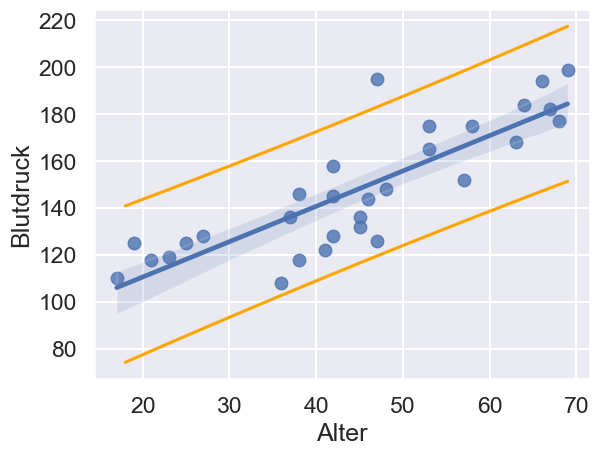

In [10]:
sns.lineplot(x=anfrage.Alter, y=vorhersage.obs_ci_lower, ax=ax, color='orange')
sns.lineplot(x=anfrage.Alter, y=vorhersage.obs_ci_upper, ax=ax, color='orange')
ax.figure

Dasselbe noch mal für das Konfidenzniveau $1-\alpha=0.99$

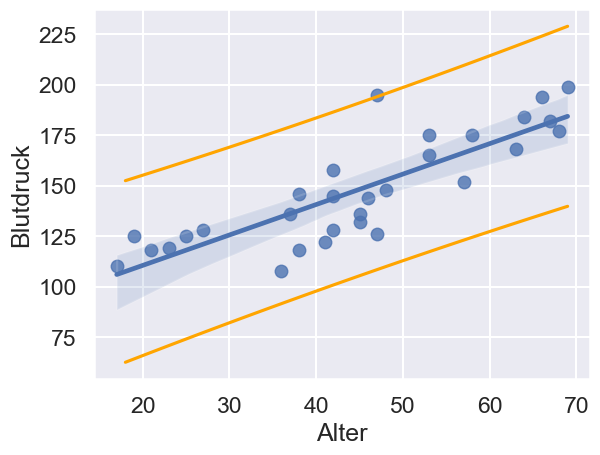

In [11]:
ax = sns.regplot(blutdruck, x='Alter', y='Blutdruck', ci=99)
vorhersage = res.get_prediction(anfrage).summary_frame(alpha=0.01)
sns.lineplot(x=anfrage.Alter, y=vorhersage.obs_ci_lower, ax=ax, color='orange')
sns.lineplot(x=anfrage.Alter, y=vorhersage.obs_ci_upper, ax=ax, color='orange');

#### Beispiel:  Fische

* Fische werden gezüchtet.  In den ersten 24 Monaten wurden die folgenden Daten erhoben
* Diesen Daten werden benutzt, um das Wachstum der nächsten Generation zu prognostizieren

In [12]:
fische = pd.read_csv('fische.csv')
fische.head()

,Monat,Höhe,Gewicht
0,4,18.361636,351.447570
1,18,82.891739,1489.847354
2,16,75.875655,1456.778649
3,5,24.685312,466.510582
4,23,102.858653,1992.998583


* Gewicht in g
* Höhe in mm

* Ein Züchter hat 1200 Fische in seinen Teichen, die alle gleichzeitig geschlüpft sind
* erste Frage:  Was ist das Konfidenzintervall für das Gesamtgewicht dieser Fische nach 18 Monaten zum Konfidenzniveau 95%?
* zweite Frage:  Wie muss das Netz gewählt werden, um nach 18 Monaten 97.5% der Fische zu fangen?

In [13]:
formel1 = 'Gewicht ~ Monat'
modell1 = smf.ols(formel1, fische)

In [14]:
res = modell1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Gewicht   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     8866.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           9.01e-74
Time:                        10:41:37   Log-Likelihood:                -365.66
No. Observations:                  70   AIC:                             735.3
Df Residuals:                      68   BIC:                             739.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6497     12.964     -0.204      0.839     -28.519      23.219
Monat         83.7359      0.889     94.161      0.000      81.961      85.510
==============================================================================
Omnibus:                        3.720   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.556
Skew:                          -0.198   Prob(JB):                        0.169
Kurtosis:                       4.030   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
anfrage = pd.DataFrame()
anfrage['Monat'] = [18]
res.get_prediction(anfrage).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1504.597078,6.904729,1490.818905,1518.375251,1412.618172,1596.575983


* untere Vertrauensgrenze für das Gesamtgewicht von 1200 Fischen in kg:

In [16]:
1200 * 1490.8 / 1000

1788.96

Mit 97.5% Sicherheit werden mindestens 1789 kg Fisch geerntet

In [17]:
formel2 = 'Höhe ~ Monat'
modell2 = smf.ols(formel2, fische)
res = modell2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Höhe   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.474e+04
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           3.13e-81
Time:                        10:41:37   Log-Likelihood:                -143.68
No. Observations:                  70   AIC:                             291.4
Df Residuals:                      68   BIC:                             295.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2723      0.544     -0.501      0.618      -1.358       0.813
Monat          4.5292      0.037    121.402      0.000       4.455       4.604
==============================================================================
Omnibus:                        3.746   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.670
Skew:                           0.521   Prob(JB):                        0.160
Kurtosis:                       2.583   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
res.get_prediction(anfrage).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,81.252727,0.289668,80.674704,81.83075,77.394018,85.111436


Um 97.5% der Fische zu fangen, muss das Netz so beschaffen sein, dass ein Fisch der Höhe 77.4mm nicht hindurch schlüpft

# Vorhersagen bei mehreren erklärenden Variablen

In [19]:
galton = pd.read_csv('galton.csv')
galton.describe()

,father,mother,midparentHeight,children,childNum,childHeight
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,69.137630,64.033264,69.146778,6.008316,2.257796,69.234096
std,2.305767,2.321623,1.775891,2.669257,1.402404,2.623905
min,62.000000,58.000000,64.400000,1.000000,1.000000,60.000000
25%,68.000000,63.000000,68.020000,4.000000,1.000000,67.500000
50%,69.000000,64.000000,69.180000,6.000000,2.000000,69.200000
75%,70.500000,66.000000,70.140000,8.000000,3.000000,71.000000
max,78.500000,70.500000,75.430000,15.000000,10.000000,79.000000


In [20]:
galton.gender.value_counts()

gender
male    481
Name: count, dtype: int64

In [21]:
formel = "childHeight ~ father + mother"
model = smf.ols(formel, galton)

In [22]:
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     74.62
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           6.25e-29
Time:                        10:41:37   Log-Likelihood:                -1080.7
No. Observations:                 481   AIC:                             2167.
Df Residuals:                     478   BIC:                             2180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3128      4.095      4.716      0.000      11.266      27.359
father         0.4176      0.046      9.154      0.000       0.328       0.507
mother         0.3288      0.045      7.258      0.000       0.240       0.418
==============================================================================
Omnibus:                       10.653   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.542
Skew:                          -0.200   Prob(JB):                     0.000695
Kurtosis:                       3.752   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Wie groß ist ein Sohn, dessen Vater 68.9 Zoll und dessen Mutter 66.4 Zoll groß ist?

In [23]:
anfrage = pd.DataFrame()
anfrage['father'] = [68.9]
anfrage['mother'] = [66.4]
anfrage

,father,mother
0,68.9,66.4


In [24]:
res.get_prediction(anfrage).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,69.912992,0.150896,69.616491,70.209492,65.393024,74.43296


Für die Größe der Sohns wird ein Wert von 69.91 Zoll erwartet

### midparentHeight

* Zu Galtons Zeiten (1822 - 1911) gab es weder die Theorie der Linearen Modelle noch die dazu benötigte Rechnerausstattung
* Daher musste er die Daten von Vater und Mutter zu einer fiktiven Größe zusammenfassen 

* Diese nannte er midparentHeight
* Im Internet steht dazu viel unverständliches

* statistics to the rescue

In [25]:
formel_mph = "midparentHeight ~ father + mother"
modell_mph = smf.ols(formel_mph, galton)
res_mph = modell_mph.fit()

In [26]:
res_mph.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        midparentHeight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.087e+26
Date:                Mon, 26 Jan 2026   Prob (F-statistic):               0.00
Time:                        10:41:37   Log-Likelihood:                 12557.
No. Observations:                 481   AIC:                        -2.511e+04
Df Residuals:                     478   BIC:                        -2.510e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.518e-13   1.99e-12      0.227      0.820   -3.46e-12    4.36e-12
father         0.5000   2.22e-14   2.26e+13      0.000       0.500       0.500
mother         0.5400    2.2e-14   2.45e+13      0.000       0.540       0.540
==============================================================================
Omnibus:                       14.588   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.675
Skew:                           0.299   Prob(JB):                     8.80e-05
Kurtosis:                       3.757   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Also

> midparentHeight = (father + 1.08 * mother)/2

ohne jeden zufälligen Anteil

* wenn also von den drei Werten `father`, `mother` und `midparentHeight` zwei bekannt sind, kann die dritte berechnet werden
* dieses Phänomen heißt "Multikollinearität"